## Sai Dutta Abhishek Dash Assignment Submission for ML-Associate Job @ BlueBashAI

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
file_path = "/kaggle/input/beer-classification/train.csv"
df = pd.read_csv(file_path)

In [7]:
# Display the first few rows
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [8]:
# Dataset Information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/bi

In [9]:
# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())


Missing Values Summary:
index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [10]:
# Basic statistics for numerical columns
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [11]:
# Check for unique values in categorical columns
categorical_columns = ['beer/name', 'beer/style', 'user/gender']
for col in categorical_columns:
    print(f"\nUnique values in {col}: {df[col].nunique()}")


Unique values in beer/name: 1688

Unique values in beer/style: 95

Unique values in user/gender: 2


Data Cleaning <br>
We’ll clean the data by:
- Handling missing values.
- Dropping irrelevant or highly sparse columns.
- Processing categorical columns.

In [13]:
# Data Cleaning

# Drop irrelevant columns (too sparse or unhelpful for prediction)
df_cleaned = df.drop(columns=['index', 'review/timeStruct', 'user/birthdayRaw', 'user/birthdayUnix'])

In [14]:
# Handle missing values
# Fill missing `review/text` with an empty string
df_cleaned['review/text'] = df_cleaned['review/text'].fillna('')

In [15]:
# Drop rows where `user/profileName` is missing (very few cases)
df_cleaned = df_cleaned.dropna(subset=['user/profileName'])

In [16]:
# Fill missing `user/gender` with 'Unknown'
df_cleaned['user/gender'] = df_cleaned['user/gender'].fillna('Unknown')

In [18]:
# Handle missing `user/ageInSeconds`
median_age = df_cleaned['user/ageInSeconds'].median()
df_cleaned['user/ageInSeconds'] = df_cleaned['user/ageInSeconds'].fillna(median_age)

In [35]:
# Display cleaned data information
print("Cleaned Dataset Info:")
df_cleaned.info()

# Save the cleaned dataset
cleaned_file_path = 'cleaned_data.csv'  # Update the file path if needed
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 37495 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37495 non-null  float64
 1   beer/beerId        37495 non-null  int64  
 2   beer/brewerId      37495 non-null  int64  
 3   beer/name          37495 non-null  object 
 4   beer/style         37495 non-null  int64  
 5   review/appearance  37495 non-null  float64
 6   review/aroma       37495 non-null  float64
 7   review/overall     37495 non-null  float64
 8   review/palate      37495 non-null  float64
 9   review/taste       37495 non-null  float64
 10  review/text        37495 non-null  object 
 11  review/timeUnix    37495 non-null  int64  
 12  user/ageInSeconds  37495 non-null  float64
 13  user/gender        37495 non-null  int64  
 14  user/profileName   37495 non-null  object 
dtypes: float64(7), int64(5), object(3)
memory usage: 4.6+

Step 3: Feature Engineering
We will:

- Use review/text for NLP-based features (TF-IDF or word embeddings).
- Encode categorical features like beer/style and user/gender.
- Normalize numerical columns for consistency.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
# 1. Text Feature Engineering with TF-IDF
tfidf = TfidfVectorizer(max_features=500, stop_words='english')  # Adjust max_features for experimentation
tfidf_matrix = tfidf.fit_transform(df_cleaned['review/text'])

In [23]:
# 2. Encode categorical variables
label_encoder = LabelEncoder()
df_cleaned['beer/style'] = label_encoder.fit_transform(df_cleaned['beer/style'])
df_cleaned['user/gender'] = label_encoder.fit_transform(df_cleaned['user/gender'])


In [25]:
# 3. Scale numerical features
scaler = StandardScaler()
numerical_features = ['beer/ABV', 'review/appearance', 'review/aroma', 
                       'review/palate', 'review/taste', 'user/ageInSeconds']
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

In [26]:
# Combine processed features
import scipy.sparse as sp
X_text = sp.hstack([tfidf_matrix, df_cleaned[numerical_features].values])
y = df_cleaned['review/overall']

In [27]:
# Display shape of features
print(f"Feature Matrix Shape: {X_text.shape}")

Feature Matrix Shape: (37495, 506)


Modeling<br>
We’ll use:
- Linear Regression for interpretability.
- Random Forest for robustness with mixed data types.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

In [30]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [31]:
# Evaluate Linear Regression
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}")

Linear Regression RMSE: 0.3882110569491993, R2: 0.6882718043839819


In [32]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [33]:
# Evaluate Random Forest
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")

Random Forest RMSE: 0.39529120154370884, R2: 0.6767975978159526


### Exploratory Data Analysis

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load cleaned dataset
cleaned_data = pd.read_csv('/kaggle/working/cleaned_data.csv')  # Update the path if needed

# Preview the cleaned data
print(cleaned_data.head())

   beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0 -1.036935        46634          14338                   Chiostro   
1  1.551400         3003            395   Bearded Pat's Barleywine   
2 -1.166352          961            365       Naughty Nellie's Ale   
3 -1.295769          429              1            Pilsner Urquell   
4 -1.295769         4904           1417  Black Sheep Ale (Special)   

   beer/style  review/appearance  review/aroma  review/overall  review/palate  \
0          61           0.169823      0.186220             4.0       0.217255   
1           4           0.169823     -0.548142             3.5      -0.531181   
2          14          -0.679405      0.186220             3.5      -0.531181   
3          35          -1.528633     -1.282504             2.5      -1.279617   
4          46           0.169823     -1.282504             3.0      -0.531181   

   review/taste                                        review/text  \
0      0.108321  Pours

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


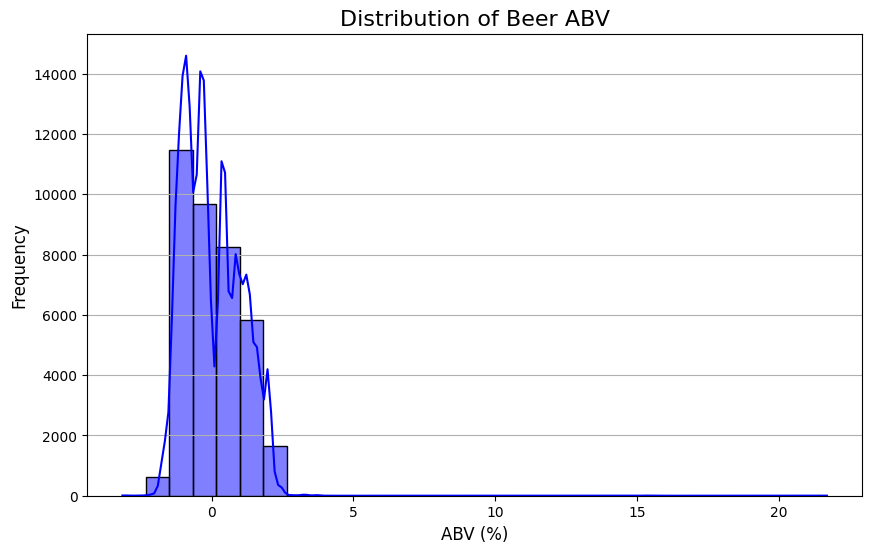

In [46]:
# 1. Distribution of Beer ABV
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['beer/ABV'], kde=True, bins=30, color='blue')
plt.title('Distribution of Beer ABV', fontsize=16)
plt.xlabel('ABV (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

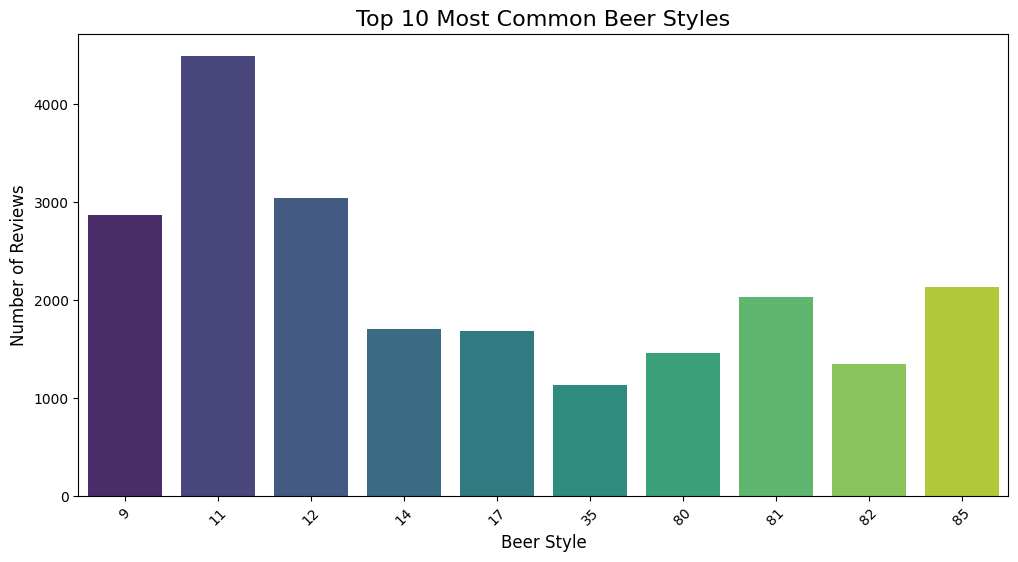

In [47]:
# 2. Top 10 Most Common Beer Styles
top_styles = cleaned_data['beer/style'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_styles.index, y=top_styles.values, palette='viridis')
plt.title('Top 10 Most Common Beer Styles', fontsize=16)
plt.xlabel('Beer Style', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.show()

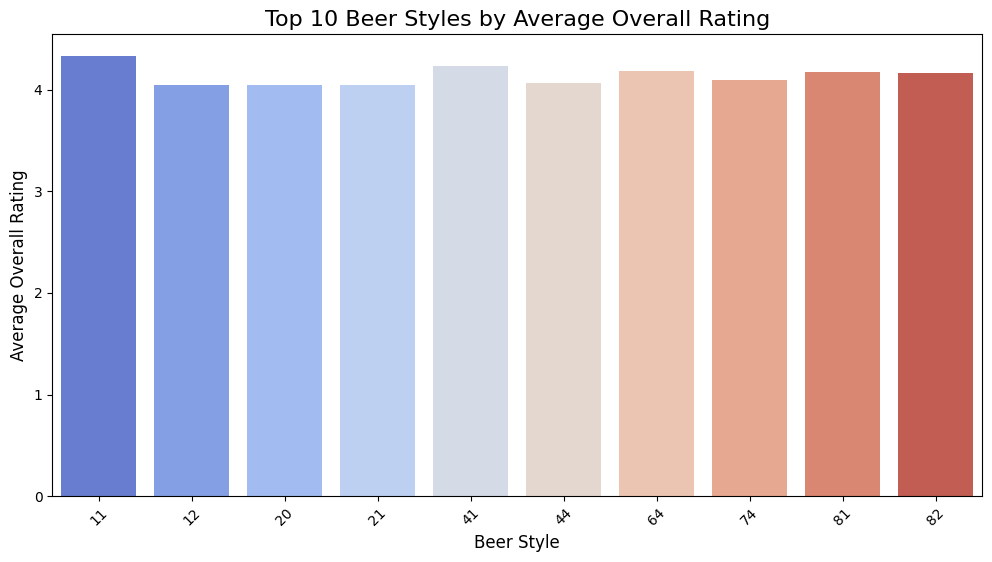

In [41]:
# 3. Average Rating by Beer Style
avg_rating_by_style = cleaned_data.groupby('beer/style')['review/overall'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_style.index, y=avg_rating_by_style.values, palette='coolwarm')
plt.title('Top 10 Beer Styles by Average Overall Rating', fontsize=16)
plt.xlabel('Beer Style', fontsize=12)
plt.ylabel('Average Overall Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

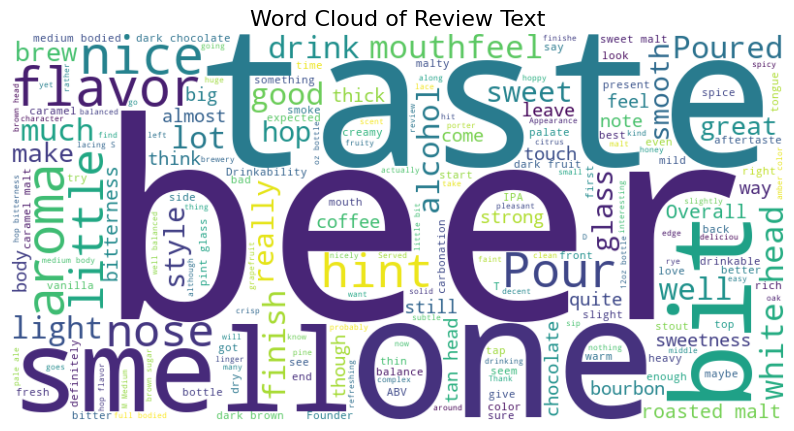

In [45]:
# 4. Word Cloud for Review Text
text = ' '.join(cleaned_data['review/text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text', fontsize=16)
plt.show()

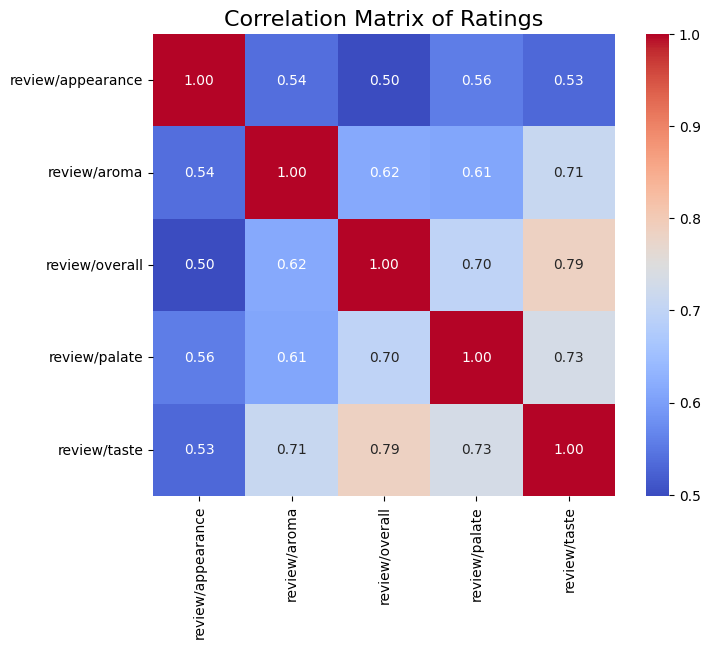

In [49]:
# 5. Correlation Matrix
corr = cleaned_data[['review/appearance', 'review/aroma', 'review/overall', 'review/palate', 'review/taste']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix of Ratings', fontsize=16)
plt.show()

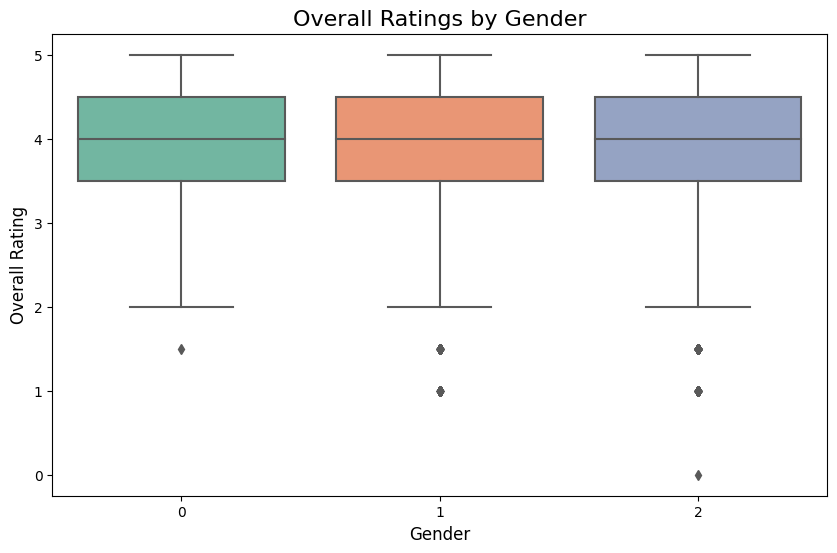

In [50]:
# 6. Box Plot of Ratings by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='user/gender', y='review/overall', data=cleaned_data, palette='Set2')
plt.title('Overall Ratings by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.show()